In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mouse EKLI.txt to mouse EKLI.txt
User uploaded file "mouse EKLI.txt" with length 23029 bytes


In [6]:
# mouse dataset from https://elki-project.github.io/datasets/
df = pd.read_csv('mouse EKLI.txt') 
df.head()

,x,y,class
0,0.456601,0.432806,Head
1,0.611378,0.528625,Head
2,0.450299,0.711606,Head
3,0.639015,0.460744,Head
4,0.628957,0.323470,Head


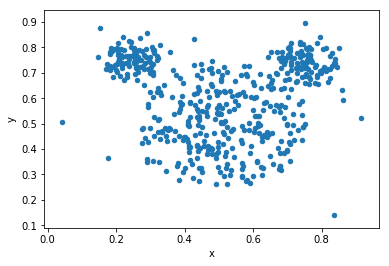

In [7]:
df.plot.scatter(x='x', y='y')

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)
kmeans.fit(df[['x', 'y']])
set(kmeans.labels_)

{0, 1}

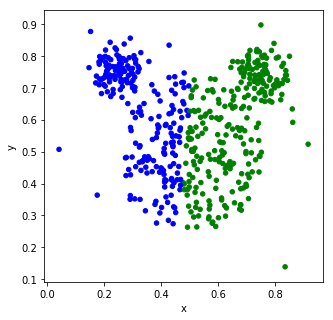

In [9]:
def f(x):  # for data with <= 6 cluster
    if x == -1: return 'k'
    a = ['b', 'g', 'r', 'c', 'm', 'y']
    return a[x]
color = np.vectorize(f)(kmeans.labels_)
df.plot.scatter(x='x', y='y', c=color, figsize=(5,5))

<Figure size 360x360 with 0 Axes>

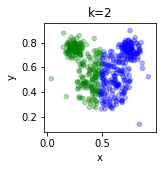

<Figure size 360x360 with 0 Axes>

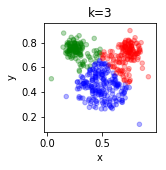

<Figure size 360x360 with 0 Axes>

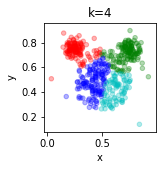

<Figure size 360x360 with 0 Axes>

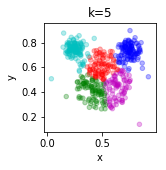

In [12]:
for k in range(2, 6):
    kmeans = KMeans(k)
    kmeans.fit(df[['x', 'y']])
    color = np.vectorize(f)(kmeans.labels_)
    plt.figure(figsize=(5,5))
    df.plot.scatter(x='x', y='y', c=color, alpha=0.3, figsize=(2,2), title='k=%d'%k)